In [1]:
# 카메라 스티커앱 만들기 첫걸음

In [2]:
import os 
import numpy as np 
import cv2 # 이미지 처리를 위한 OpenCV 라이브러리
import dlib # 얼굴 검출 및 랜드마크 추정 등을 위한 dlib 라이브러리
import matplotlib.pyplot as plt 

In [3]:
# 이미지들의 경로를 성정하고 이미지를 불러오는데 OpenCV는 BGR 형식으로 읽어서 RGB 형식으로 변환 필요
home_dir = os.getenv("HOME")
middle_image_path = os.path.join(home_dir, "work/camera_sticker/images/middle_image.png")
left_image_path = os.path.join(home_dir, "work/camera_sticker/images/left_image.png")
right_image_path = os.path.join(home_dir, "work/camera_sticker/images/right_image.png")
far_image_path = os.path.join(home_dir, "work/camera_sticker/images/far_image.png")

middle_img_bgr = cv2.imread(middle_image_path)
left_img_bgr = cv2.imread(left_image_path)
right_img_bgr = cv2.imread(right_image_path)
far_img_bgr = cv2.imread(far_image_path)
dark_img_bgr = (middle_img_bgr * 0.12).astype(np.uint8)
flip_img_bgr = cv2.flip(middle_img_bgr, 0)

# 원본 이미지 손상 방지
middle_img_show = middle_img_bgr.copy()
left_img_show = left_img_bgr.copy()
right_img_show = right_img_bgr.copy()
far_img_show = far_img_bgr.copy()
dark_img_show = dark_img_bgr.copy()
flip_img_show = flip_img_bgr.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

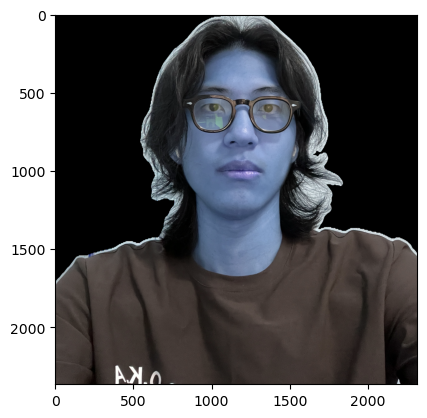

In [4]:
# 중앙 이미지(BGR) 시각화
plt.imshow(middle_img_bgr)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

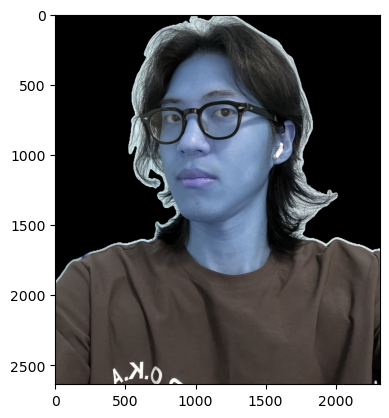

In [5]:
# 왼쪽 이미지(BGR) 시각화
plt.imshow(left_img_bgr)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

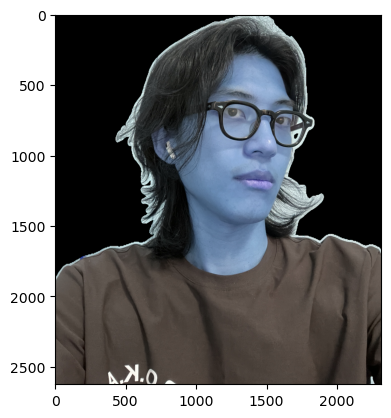

In [6]:
# 오른쪽 이미지(BGR)
plt.imshow(right_img_bgr)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

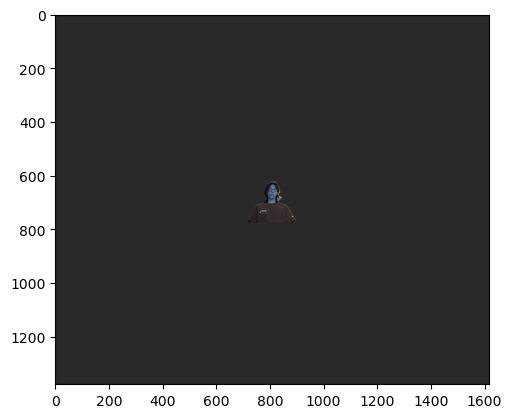

In [7]:
# 먼 이미지(BGR) 시각화
plt.imshow(far_img_bgr)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

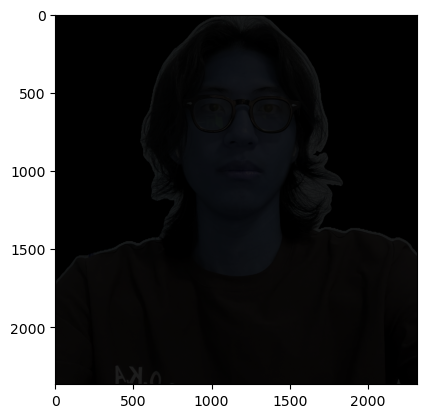

In [8]:
# 어두운 이미지(BGR) 시각화
plt.imshow(dark_img_bgr)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

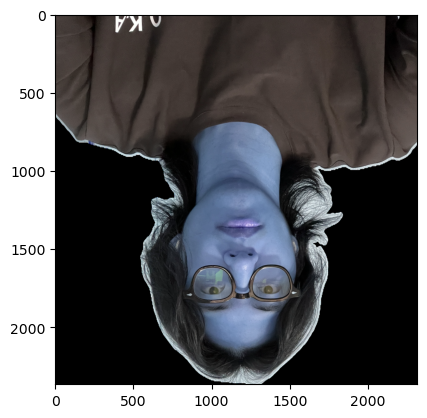

In [9]:
# 상하 반전 이미지(BGR) 시각화
plt.imshow(flip_img_bgr)
plt.show

In [10]:
# BGR 형식으로 읽은 이미지를 RGB 형식으로 변환
middle_img_rgb = cv2.cvtColor(middle_img_bgr, cv2.COLOR_BGR2RGB)
left_img_rgb = cv2.cvtColor(left_img_bgr, cv2.COLOR_BGR2RGB)
right_img_rgb = cv2.cvtColor(right_img_bgr, cv2.COLOR_BGR2RGB)
far_img_rgb = cv2.cvtColor(far_img_bgr, cv2.COLOR_BGR2RGB)
dark_img_rgb = cv2.cvtColor(dark_img_bgr, cv2.COLOR_BGR2RGB)
flip_img_rgb = cv2.cvtColor(flip_img_bgr, cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

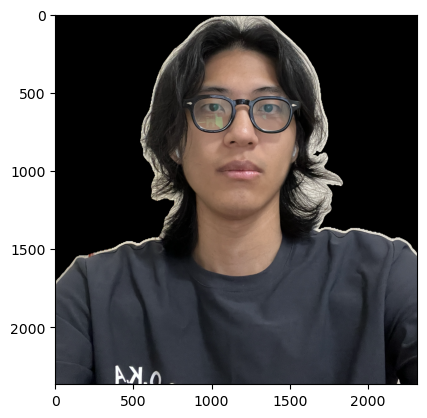

In [11]:
# 중앙 이미지(RGB) 시각화
plt.imshow(middle_img_rgb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

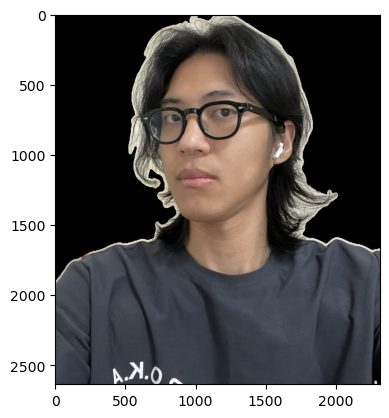

In [12]:
# 왼쪽 이미지(RGB) 시각화
plt.imshow(left_img_rgb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

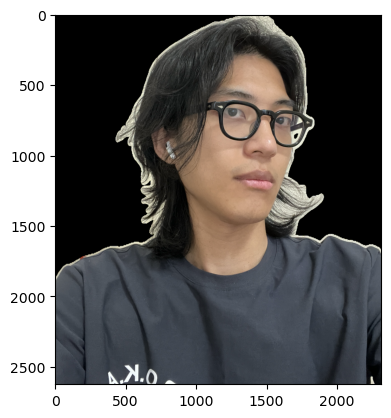

In [13]:
# 오른쪽 이미지(RGB) 시각화
plt.imshow(right_img_rgb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

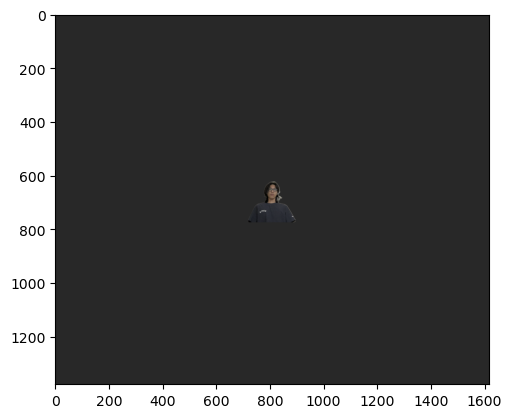

In [14]:
# 먼 이미지(RGB) 시각화
plt.imshow(far_img_rgb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

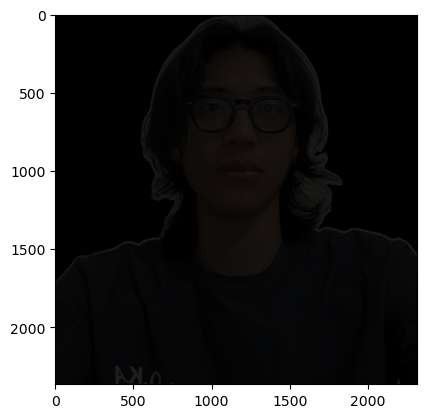

In [15]:
# 어두운 이미지(RGB) 시각화
plt.imshow(dark_img_rgb)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

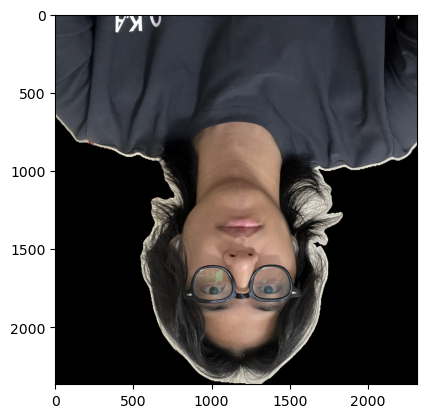

In [16]:
# 상하 반전 이미지(RGB) 시각화
plt.imshow(flip_img_rgb)
plt.show

In [17]:
# dlib의 HOG 기반 얼굴 검출기 초기화
detector_hog = dlib.get_frontal_face_detector()

# 각 이미지에서 얼굴 영역을 감지 뒤의 숫자가 클수록 작은 얼굴을 더 잘 찾지만 속도는 느려짐
middle_dlib_rects = detector_hog(middle_img_rgb, 1)
left_dlib_rects = detector_hog(left_img_rgb, 1)
right_dlib_rects = detector_hog(right_img_rgb, 1)
far_dlib_rects = detector_hog(far_img_rgb, 1)
dark_dlib_rects = detector_hog(dark_img_rgb, 1)
flip_dlib_rects = detector_hog(flip_img_rgb, 1)

rectangles[[(780, 426) (1579, 1224)]]


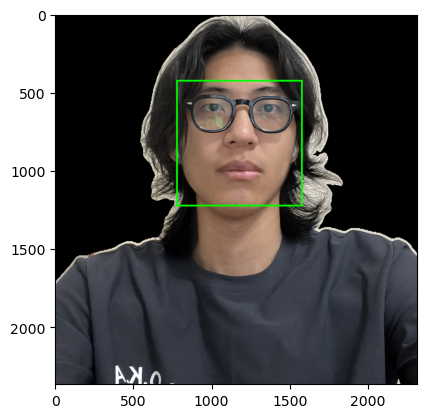

In [18]:
# (중요) 중앙 이미지 얼굴 탐지 Bounding Box 생성 및 시각화
print(middle_dlib_rects)

# 탐지된 얼굴에 Bounding Box 생성
for middle_dlib_rect in middle_dlib_rects:
    l = middle_dlib_rect.left() # 왼쪽 좌표
    t = middle_dlib_rect.top() # 위쪽 좌표
    r = middle_dlib_rect.right() # 오른쪽 좌표
    b = middle_dlib_rect.bottom() # 아래쪽 좌표
    # Bounding 박스를 두께는 10 그리고 cv2.LINE_AA를 활용해 테두리를 부드럽게 생성
    cv2.rectangle(middle_img_show, (l, t), (r, b), (0, 255, 0), 10, lineType=cv2.LINE_AA)

# 탐지된 얼굴에 Bounding Box 생성 시각화
middle_img_show_rgb =  cv2.cvtColor(middle_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(middle_img_show_rgb)
plt.show()

rectangles[[(510, 405) (1469, 1363)]]


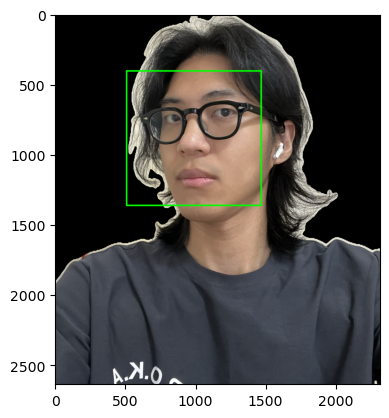

In [19]:
# 왼쪽 이미지 얼굴 탐지 Bounding Box 생성 및 시각화
print(left_dlib_rects)

for left_dlib_rect in left_dlib_rects:
    l = left_dlib_rect.left() 
    t = left_dlib_rect.top() 
    r = left_dlib_rect.right() 
    b = left_dlib_rect.bottom() 

    cv2.rectangle(left_img_show, (l, t), (r, b), (0, 255, 0), 10, lineType=cv2.LINE_AA)

left_img_show_rgb =  cv2.cvtColor(left_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(left_img_show_rgb)
plt.show()

rectangles[[(936, 405) (1895, 1363)]]


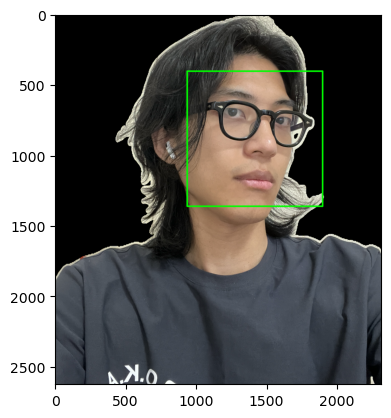

In [20]:
# 오른쪽 이미지 얼굴 탐지 Bounding Box 생성 및 시각화
print(right_dlib_rects)

for right_dlib_rect in right_dlib_rects:
    l = right_dlib_rect.left() 
    t = right_dlib_rect.top() 
    r = right_dlib_rect.right() 
    b = right_dlib_rect.bottom() 

    cv2.rectangle(right_img_show, (l, t), (r, b), (0, 255, 0), 10, lineType=cv2.LINE_AA)

right_img_show_rgb =  cv2.cvtColor(right_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(right_img_show_rgb)
plt.show()

rectangles[[(789, 641) (832, 684)]]


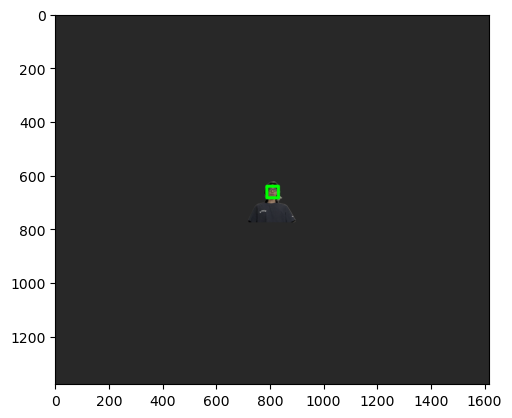

In [21]:
# 먼 이미지 얼굴 탐지 Bounding Box 생성 및 시각화
print(far_dlib_rects)

for far_dlib_rect in far_dlib_rects:
    l = far_dlib_rect.left() 
    t = far_dlib_rect.top() 
    r = far_dlib_rect.right() 
    b = far_dlib_rect.bottom() 

    cv2.rectangle(far_img_show, (l, t), (r, b), (0, 255, 0), 10, lineType=cv2.LINE_AA)

far_img_show_rgb =  cv2.cvtColor(far_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(far_img_show_rgb)
plt.show()

rectangles[[(780, 426) (1579, 1224)]]


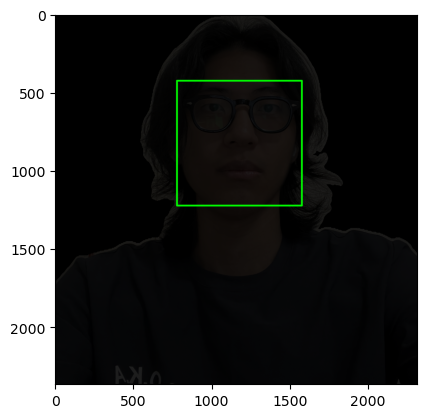

In [22]:
# 어두운 이미지 얼굴 탐지 Bounding Box 생성 및 시각화
print(dark_dlib_rects)

for dark_dlib_rect in dark_dlib_rects:
    l = dark_dlib_rect.left() 
    t = dark_dlib_rect.top() 
    r = dark_dlib_rect.right() 
    b = dark_dlib_rect.bottom() 

    cv2.rectangle(dark_img_show, (l, t), (r, b), (0, 255, 0), 10, lineType=cv2.LINE_AA)

dark_img_show_rgb =  cv2.cvtColor(dark_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(dark_img_show_rgb)
plt.show()

rectangles[[(736, 736) (2116, 2117)]]


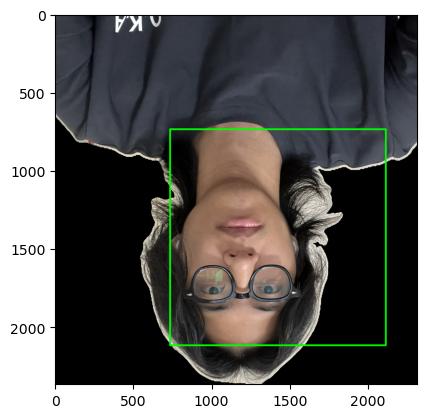

In [23]:
# 상하 반전 이미지 얼굴 탐지 Bounding Box 생성 및 시각화
print(flip_dlib_rects)

for flip_dlib_rect in flip_dlib_rects:
    l = flip_dlib_rect.left() 
    t = flip_dlib_rect.top() 
    r = flip_dlib_rect.right() 
    b = flip_dlib_rect.bottom() 

    cv2.rectangle(flip_img_show, (l, t), (r, b), (0, 255, 0), 10, lineType=cv2.LINE_AA)

flip_img_show_rgb =  cv2.cvtColor(flip_img_show, cv2.COLOR_BGR2RGB)
plt.imshow(flip_img_show_rgb)
plt.show()

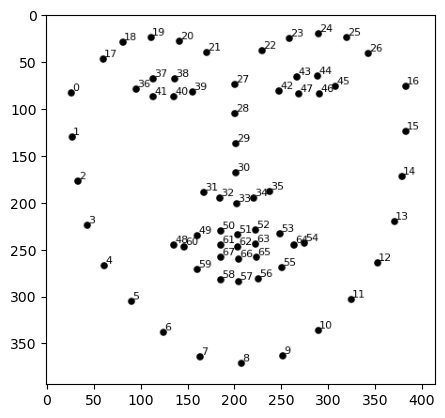

In [24]:
# (중요) 68개 얼굴 랜드마크 모델 로드 (눈, 코, 입 그리고 턱 등등 주요 지점 예측, 총 68개)
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
landmark_predictor = dlib.shape_predictor(model_path)

landmark_image_path = os.path.join(home_dir, "work/camera_sticker/images/landmark.png")
landmark_img = plt.imread(landmark_image_path)
plt.imshow(landmark_img)
plt.show()

# 랜드마크를 활용해서 스티커를 어디에 붙일것인지를 결정

In [25]:
# (중요) 중앙 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 추출 
middle_list_landmarks = [] # 얼굴의 랜드마크의 좌표를 저장 할 빈 리스트

for middle_dlib_rect in middle_dlib_rects:
    # 해당 얼굴 영역에서 68개의 랜드마크 점 예측 (눈, 코, 입, 턱 등)
    middle_points = landmark_predictor(middle_img_rgb, middle_dlib_rect)
    # 예측된 랜드마크 객체를 (x, y) 좌표 튜플로 변환하여 리스트로 저장
    middle_list_points = list(map(lambda p: (p.x, p.y), middle_points.parts()))
    # 변환된 리스트를 전체 얼굴 랜드마크 빈 리스트에 추가
    middle_list_landmarks.append(middle_list_points)

# 얼굴의 랜드마크 개수를 출력 (정상이라면 68개)
print(len(middle_list_landmarks[0]))

68


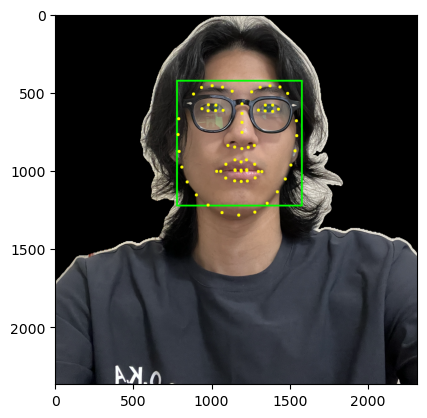

In [26]:
# (중요) 중앙 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 시각화
# 감지된 각 얼굴의 랜드마크에 대해 반복
for middle_landmark in middle_list_landmarks:
    # 각 얼굴 랜드마크 리스트에서 (x, y) 좌표를 하나씩 꺼냄
    for middle_point in middle_landmark:
        # 해당 좌표에 반지름 10, 노란색(BGR: (0, 255, 255)) 원을 그림 -1은 내부를 채우겠다는 의미
        cv2.circle(middle_img_show, middle_point, 10, (0, 255, 255), -1)

# Bounding Box 내의 얼굴 랜드마크 시각화
middle_img_show_rgb = cv2.cvtColor(middle_img_show, cv2.COLOR_BGR2RGB)

plt.imshow(middle_img_show_rgb)
plt.show()

In [27]:
# 왼쪽 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 추출
left_list_landmarks = []

for left_dlib_rect in left_dlib_rects:
    left_points = landmark_predictor(left_img_rgb, left_dlib_rect)
    left_list_points = list(map(lambda p: (p.x, p.y), left_points.parts()))
    left_list_landmarks.append(left_list_points)

print(len(middle_list_landmarks[0]))

68


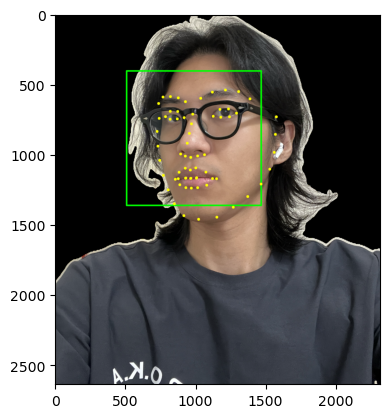

In [28]:
# 왼쪽 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 시각화
for left_landmark in left_list_landmarks:
    for left_point in left_landmark:
        cv2.circle(left_img_show, left_point, 10, (0, 255, 255), -1)

left_img_show_rgb = cv2.cvtColor(left_img_show, cv2.COLOR_BGR2RGB)

plt.imshow(left_img_show_rgb)
plt.show()

In [29]:
# 오른쪽 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 추출
right_list_landmarks = []

for right_dlib_rect in right_dlib_rects:
    right_points = landmark_predictor(right_img_rgb, right_dlib_rect)
    right_list_points = list(map(lambda p: (p.x, p.y), right_points.parts()))
    right_list_landmarks.append(right_list_points)

print(len(middle_list_landmarks[0]))

68


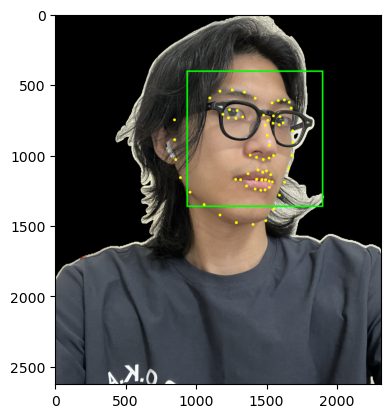

In [30]:
# 오른쪽 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 시각화
for right_landmark in right_list_landmarks:
    for right_point in right_landmark:
        cv2.circle(right_img_show, right_point, 10, (0, 255, 255), -1)

right_img_show_rgb = cv2.cvtColor(right_img_show, cv2.COLOR_BGR2RGB)

plt.imshow(right_img_show_rgb)
plt.show()

In [31]:
# 먼 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 추출
far_list_landmarks = []

for far_dlib_rect in far_dlib_rects:
    far_points = landmark_predictor(far_img_rgb, far_dlib_rect)
    far_list_points = list(map(lambda p: (p.x, p.y), far_points.parts()))
    far_list_landmarks.append(far_list_points)

print(len(far_list_landmarks[0]))

68


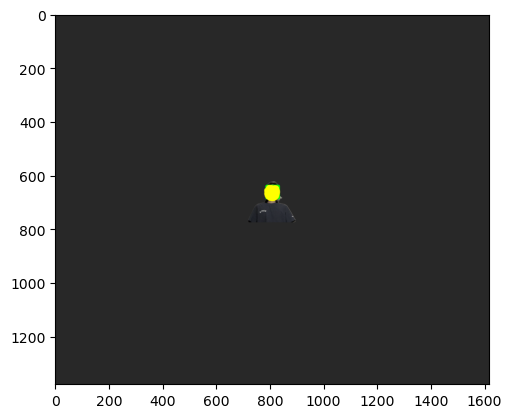

In [32]:
# 먼 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 시각화
for far_landmark in far_list_landmarks:
    for far_point in far_landmark:
        cv2.circle(far_img_show, far_point, 10, (0, 255, 255), -1)

far_img_show_rgb = cv2.cvtColor(far_img_show, cv2.COLOR_BGR2RGB)

plt.imshow(far_img_show_rgb)
plt.show()

In [33]:
# 어두운 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 추출
dark_list_landmarks = []

for dark_dlib_rect in dark_dlib_rects:
    dark_points = landmark_predictor(dark_img_rgb, dark_dlib_rect)
    dark_list_points = list(map(lambda p: (p.x, p.y), dark_points.parts()))
    dark_list_landmarks.append(dark_list_points)

print(len(dark_list_landmarks[0]))

68


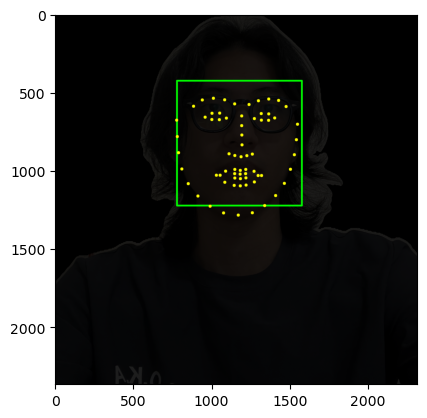

In [34]:
# 어두운 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 시각화
for dark_landmark in dark_list_landmarks:
    for dark_point in dark_landmark:
        cv2.circle(dark_img_show, dark_point, 10, (0, 255, 255), -1)

dark_img_show_rgb = cv2.cvtColor(dark_img_show, cv2.COLOR_BGR2RGB)

plt.imshow(dark_img_show_rgb)
plt.show()

In [35]:
# 상하 반전 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 추출
flip_list_landmarks = []

for flip_dlib_rect in flip_dlib_rects:
    flip_points = landmark_predictor(flip_img_rgb, flip_dlib_rect)
    flip_list_points = list(map(lambda p: (p.x, p.y), flip_points.parts()))
    flip_list_landmarks.append(flip_list_points)

print(len(flip_list_landmarks[0]))

68


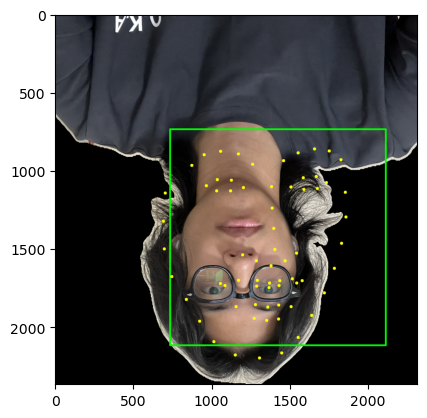

In [36]:
# 상하 반전 이미지 얼굴 탐지 Bounding Box 내의 얼굴 랜드마크 시각화
for flip_landmark in flip_list_landmarks:
    for flip_point in flip_landmark:
        cv2.circle(flip_img_show, flip_point, 10, (0, 255, 255), -1)

flip_img_show_rgb = cv2.cvtColor(flip_img_show, cv2.COLOR_BGR2RGB)

plt.imshow(flip_img_show_rgb)
plt.show()

In [37]:
# (중요) 중앙 이미지 랜드 마크 기반 위치 계산(코 끝 기준)
# 탐지된 얼굴 영역과 해당 얼굴의 랜드마크 좌표 리스트를 동시에 순회
for middle_dlib_rect, middle_landmark in zip(middle_dlib_rects, middle_list_landmarks): 
    #33번 랜드마크는 코끝에 해당 스티커가 고양이 코와 수염 형태라 코에 스티커 붙이기
    print (middle_landmark[33])
    # 코끝의 x, y 좌표 추출
    x = middle_landmark[33][0] 
    y = middle_landmark[33][1]
    # 얼굴 Bounding Box의 너비를 기준으로 스티커 너비와 높이 설정
    w = h = middle_dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1195, 860)
(x,y) : (1195,860)
(w,h) : (800,800)


(800, 800, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

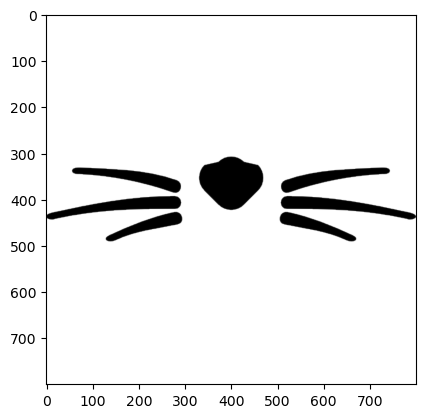

In [38]:
# (중요) 스티커 이미지 시각화 채널이 4개인 이유는 RGB + Alpha(투명도) 채널을 포함하기 때문 그리고 사진마다 Bounding Box의 크기가 다르기 때문에 스티커의 크기 조정을 위해 매번 초기화
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat_whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) # Alaha 채널을 포함해야 흰색 배경 안생김
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

plt.imshow(img_sticker)
plt.show

In [39]:
# (중요) 스티커가 얼굴 중앙에 오도록 하고 자연스러움을 위해 y좌표를 20픽셀 더 위로 울림
refined_x = x - w // 2 
refined_y = y - h // 2 - 20
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (795,440)


In [40]:
# (중요) 스티커가 이미지 밖으로 나가지 않게 음수 좌표는 0으로 보정하고 스티커 이미지도 해당 부분 잘라냄
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (795,440)


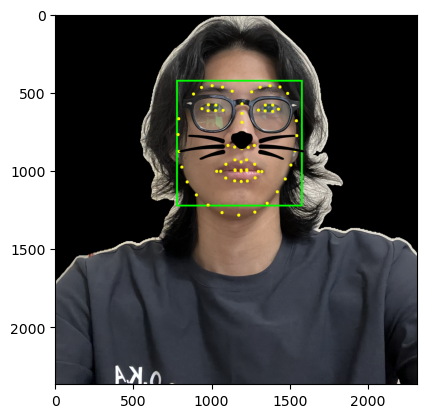

In [41]:
# (중요) 알파 블렌딩을 적용해 스티커의 불투명한 부분만 합성하고, 투명한 부분은 원본을 그대로 사용
# 스티커를 덮어씌울 영역 추출 
sticker_area = middle_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# Alpha 채널 추출 및 0~1 범위로 정규화
sticker_alpha = img_sticker[:, :, 3] / 255.0  
# 브로드 캐스팅을 위해 Alpha채널을 3채널로 확장
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2) 
# 스티커 이미지에서 RGB 채널만 분리하고 float32로 변환
sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
# 대상 이미지 영역도 float32로 변환
sticker_area = sticker_area.astype(np.float32)
# 알파 블렌딩 공식 적용: blended = α * sticker + (1 - α) * background
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
# 원본 이미지에 합성된 결과 덮어쓰기
middle_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = blended

# 바운딩 박스와 스티커를 붙인 얼굴 이미지 시각화
plt.imshow(cv2.cvtColor(middle_img_show, cv2.COLOR_BGR2RGB))
plt.show()

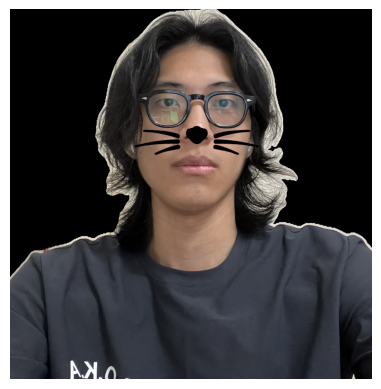

In [42]:
# (중요) Bounding Box를 제외한 중앙 이미지 얼굴에 스티커 붙인 최종 결과 위의 코드와 동일
sticker_area = middle_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]
# 스티커가 Alpha 채널 보유하나 보유하지 않나의 차이를 조건문으로 설정
if img_sticker.shape[2] == 4:  
    sticker_alpha = img_sticker[:, :, 3] / 255.0  # (H, W)
    sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)  # (H, W, 3)
    sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
    sticker_area = sticker_area.astype(np.float32)
    blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
    middle_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = blended
else:
    middle_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

# 최종 결과 시각화
plt.imshow(cv2.cvtColor(middle_img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [43]:
# 왼쪽 이미지 랜드 마크 기반 위치 계산(코 끝 기준)
for left_dlib_rect, middle_landmark in zip(left_dlib_rects, left_list_landmarks): 
    print (left_landmark[33]) 
    x = left_landmark[33][0] 
    y = left_landmark[33][1]
    w = h = left_dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(967, 1021)
(x,y) : (967,1021)
(w,h) : (960,960)


In [44]:
# 스티커 이미지
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat_whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(960, 960, 4)


In [45]:
# 스티커가 얼굴 중앙에 오도록 하고 자연스러움을 위해 y좌표를 20픽셀 더 위로 울림
refined_x = x - w // 2 
refined_y = y - h // 2 - 20
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (487,521)


In [46]:
# 스티커가 이미지 밖으로 나가지 않게 음수 좌표는 0으로 보정하고 스티커 이미지도 해당 부분 잘라냄
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (487,521)


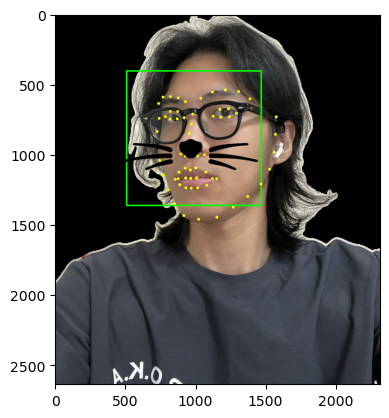

In [47]:
# 알파 블렌딩을 적용해 스티커의 불투명한 부분만 합성하고, 투명한 부분은 원본을 그대로 사용
sticker_area = left_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_alpha = img_sticker[:, :, 3] / 255.0  
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2) 
sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
sticker_area = sticker_area.astype(np.float32)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
left_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = blended

plt.imshow(cv2.cvtColor(left_img_show, cv2.COLOR_BGR2RGB))
plt.show()

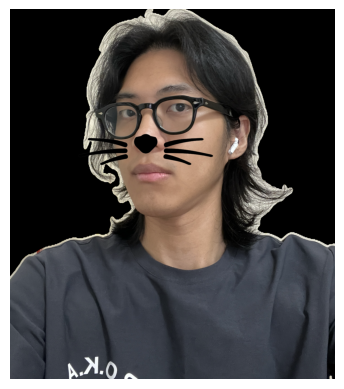

In [48]:
# 왼쪽 이미지에 스티커 붙이기
sticker_area = left_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

if img_sticker.shape[2] == 4:  
    sticker_alpha = img_sticker[:, :, 3] / 255.0  # (H, W)
    sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)  # (H, W, 3)
    sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
    sticker_area = sticker_area.astype(np.float32)
    blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
    left_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = blended
else:
    left_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(left_img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [49]:
# 오른쪽 이미지 랜드 마크 기반 위치 계산(코 끝 기준)
for right_dlib_rect, right_landmark in zip(right_dlib_rects, right_list_landmarks): 
    print (right_landmark[33]) 
    x = right_landmark[33][0] 
    y = right_landmark[33][1]
    w = h = right_dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1475, 1031)
(x,y) : (1475,1031)
(w,h) : (960,960)


In [50]:
# 스티커 이미지
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat_whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(960, 960, 4)


In [51]:
# 스티커가 얼굴 중앙에 오도록 하고 자연스러움을 위해 y좌표를 20픽셀 더 위로 울림
refined_x = x - w // 2 
refined_y = y - h // 2 - 20
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (995,531)


In [52]:
# 스티커가 이미지 밖으로 나가지 않게 음수 좌표는 0으로 보정하고 스티커 이미지도 해당 부분 잘라냄
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (995,531)


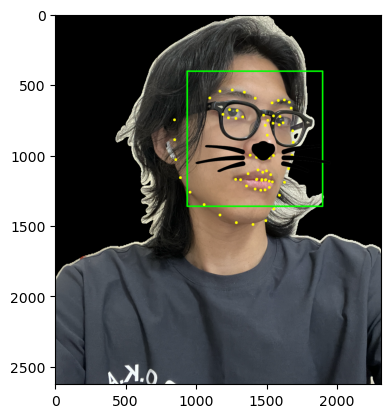

In [53]:
# 알파 블렌딩을 적용해 스티커의 불투명한 부분만 합성하고, 투명한 부분은 원본을 그대로 사용
sticker_area = right_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_alpha = img_sticker[:, :, 3] / 255.0  
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2) 
sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
sticker_area = sticker_area.astype(np.float32)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
right_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = blended

plt.imshow(cv2.cvtColor(right_img_show, cv2.COLOR_BGR2RGB))
plt.show()

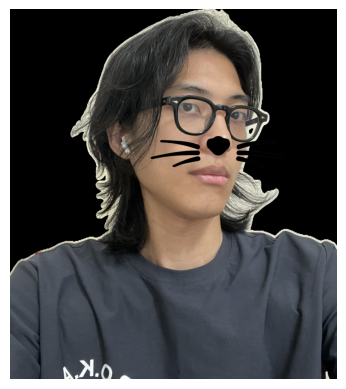

In [54]:
# 오른쪽 이미지에 스티커 붙이기
sticker_area = right_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

if img_sticker.shape[2] == 4:  
    sticker_alpha = img_sticker[:, :, 3] / 255.0  
    sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)  
    sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
    sticker_area = sticker_area.astype(np.float32)
    blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
    right_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = blended
else:
    right_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(right_img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [55]:
# 먼 이미지 랜드 마크 기반 위치 계산(코 끝 기준)
for far_dlib_rect, far_landmark in zip(far_dlib_rects, far_list_landmarks): 
    print (far_landmark[33]) 
    x = far_landmark[33][0] 
    y = far_landmark[33][1]
    w = h = far_dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(810, 665)
(x,y) : (810,665)
(w,h) : (44,44)


In [56]:
# 스티커 이미지 
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat_whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(44, 44, 4)


In [57]:
# 스티커가 얼굴 중앙에 오도록 하고 자연스러움을 위해 y좌표를 20픽셀 더 위로 울림
refined_x = x - w // 2 
refined_y = y - h // 2 - 20
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (788,623)


In [58]:
# 스티커가 이미지 밖으로 나가지 않게 음수 좌표는 0으로 보정하고 스티커 이미지도 해당 부분 잘라냄
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (788,623)


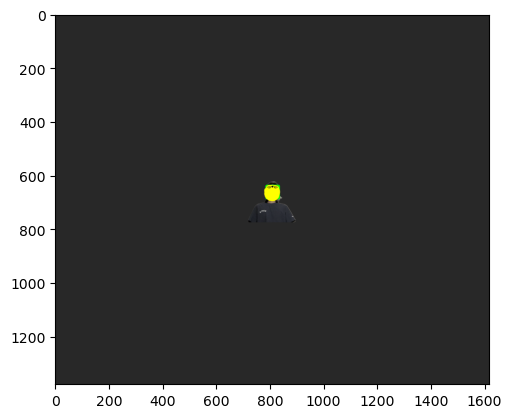

In [59]:
# 알파 블렌딩을 적용해 스티커의 불투명한 부분만 합성하고, 투명한 부분은 원본을 그대로 사용
sticker_area = far_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_alpha = img_sticker[:, :, 3] / 255.0  
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2) 
sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
sticker_area = sticker_area.astype(np.float32)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
far_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = blended

plt.imshow(cv2.cvtColor(far_img_show, cv2.COLOR_BGR2RGB))
plt.show()

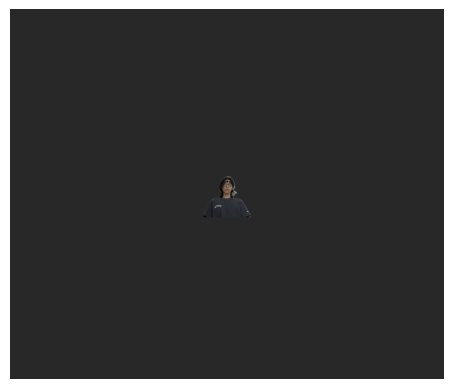

In [60]:
# 먼 이미지에 스티커 붙이기
sticker_area = far_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

if img_sticker.shape[2] == 4:  
    sticker_alpha = img_sticker[:, :, 3] / 255.0  
    sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)  
    sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
    sticker_area = sticker_area.astype(np.float32)
    blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
    far_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = blended
else:
    far_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(far_img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [61]:
# 어두운 이미지 랜드 마크 기반 위치 계산(코 끝 기준)
for dark_dlib_rect, dark_landmark in zip(dark_dlib_rects, dark_list_landmarks): 
    print (dark_landmark[33]) 
    x = dark_landmark[33][0] 
    y = dark_landmark[33][1]
    w = h = dark_dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1190, 912)
(x,y) : (1190,912)
(w,h) : (800,800)


In [62]:
# 스티커 이미지
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat_whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(800, 800, 4)


In [63]:
# 스티커가 얼굴 중앙에 오도록 하고 자연스러움을 위해 y좌표를 20픽셀 더 위로 울림
refined_x = x - w // 2 
refined_y = y - h // 2 - 20
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (790,492)


In [64]:
# 스티커가 이미지 밖으로 나가지 않게 음수 좌표는 0으로 보정하고 스티커 이미지도 해당 부분 잘라냄
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (790,492)


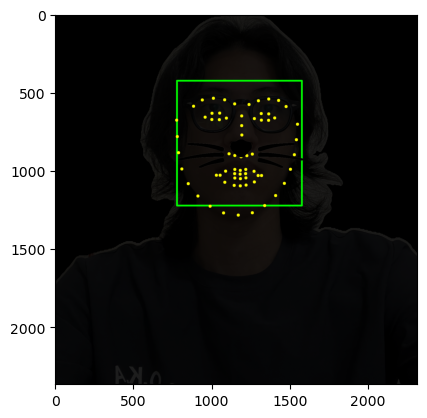

In [65]:
# 알파 블렌딩을 적용해 스티커의 불투명한 부분만 합성하고, 투명한 부분은 원본을 그대로 사용
sticker_area = dark_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_alpha = img_sticker[:, :, 3] / 255.0  
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2) 
sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
sticker_area = sticker_area.astype(np.float32)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
dark_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = blended

plt.imshow(cv2.cvtColor(dark_img_show, cv2.COLOR_BGR2RGB))
plt.show()

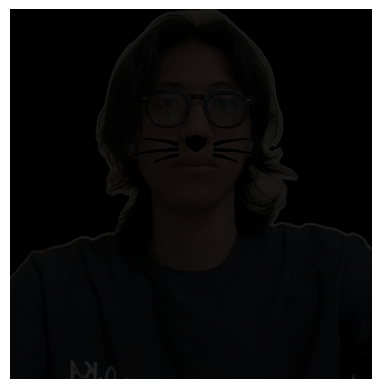

In [66]:
# 어두운 이미지에 스티커 붙이기
sticker_area = dark_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

if img_sticker.shape[2] == 4:  
    sticker_alpha = img_sticker[:, :, 3] / 255.0  
    sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)  
    sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
    sticker_area = sticker_area.astype(np.float32)
    blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
    dark_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = blended
else:
    dark_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(dark_img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [67]:
# 상하 반전 이미지 랜드 마크 기반 위치 계산(코 끝 기준)
for flip_dlib_rect, flip_landmark in zip(flip_dlib_rects, flip_list_landmarks): 
    print (flip_landmark[33]) 
    x = flip_landmark[33][0] 
    y = flip_landmark[33][1]
    w = h = flip_dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1382, 1609)
(x,y) : (1382,1609)
(w,h) : (1381,1381)


In [68]:
# 스티커 이미지
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat_whiskers.png')
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(1381, 1381, 4)


In [69]:
# 스티커가 얼굴 중앙에 오도록 하고 자연스러움을 위해 y좌표를 20픽셀 더 위로 울림
refined_x = x - w // 2 
refined_y = y - h // 2 - 20
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (692,899)


In [70]:
# 스티커가 이미지 밖으로 나가지 않게 음수 좌표는 0으로 보정하고 스티커 이미지도 해당 부분 잘라냄
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (692,899)


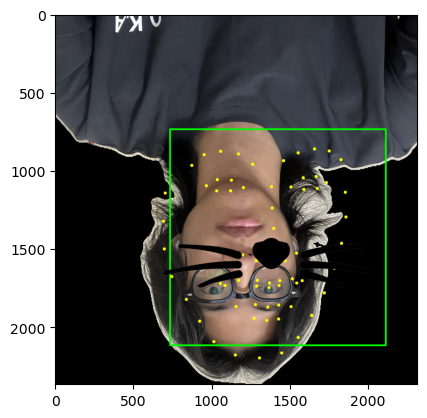

In [71]:
# 알파 블렌딩을 적용해 스티커의 불투명한 부분만 합성하고, 투명한 부분은 원본을 그대로 사용
sticker_area = flip_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_alpha = img_sticker[:, :, 3] / 255.0  
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2) 
sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
sticker_area = sticker_area.astype(np.float32)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
flip_img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = blended

plt.imshow(cv2.cvtColor(flip_img_show, cv2.COLOR_BGR2RGB))
plt.show()

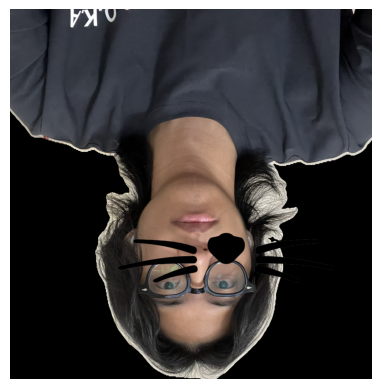

In [72]:
# 상하 반전 이미지에 스티커 붙이기
sticker_area = flip_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

if img_sticker.shape[2] == 4:  
    sticker_alpha = img_sticker[:, :, 3] / 255.0  
    sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)  
    sticker_rgb = img_sticker[:, :, :3].astype(np.float32)
    sticker_area = sticker_area.astype(np.float32)
    blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)
    flip_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = blended
else:
    flip_img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = np.where(img_sticker == 0, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(flip_img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [73]:
# Review
# 정면, 좌측, 우측 각도의 얼굴 이미지와 멀리서 찍은 얼굴 이미지, 어두운 얼굴 이미지, 그리고 상하 반전된 얼굴 이미지를 활용하여 얼굴에 스티커를 붙이는 프로젝트를 수행하였다.
# 스티커를 자연스럽게 합성하기 위해서는 Alpha 채널의 활용이 필수적이었다. Alpha 채널이 없는 경우, 스티커의 투명한 영역이 흰색 배경으로 출력되어 원하는 결과를 얻을 수 없었다.
# 이 문제는 스티커의 Alpha 채널이 0인 부분을 원본 이미지의 해당 영역으로 대체하는 방식의 알파 블렌딩으로 해결하였다.
# 정면, 좌측 그리고 우측 얼굴 이미지에서는 랜드마크를 정확히 탐지하였고, 원하는 위치에 스티커가 잘 부착되었다.
# 그러나 멀리서 촬영한 얼굴 이미지에서는 얼굴 탐지는 가능했으나, 랜드마크가 부정확하게 추정되었다. 이 경우, 업샘플링 횟수를 증가시켜 얼굴 크기를 키우면 문제를 어느 정도 해결할 수 있지만, 그만큼 계산 시간이 길어지는 단점이 있다.
# 어두운 이미지의 경우, 조도가 너무 낮지 않으면 바운딩 박스와 랜드마크 모두 정상적으로 탐지되었으나, 너무 어두운 경우에는 얼굴 탐지 자체가 실패했다.
# 마지막으로, 상하 반전된 이미지의 경우는 얼굴이 일반적인 방향이 아닌 상태이므로, 기존 얼굴 탐지 모델이 제대로 작동하지 않아 오류가 발생했다. 이는 학습된 모델이 상하 반전된 얼굴을 고려하지 않았기 때문이다.
# 결론적으로, 정상적인 방향의 얼굴, 적절한 거리 그리고 충분한 밝기의 조건이 갖춰진 경우 스티커 부착이 잘 이루어진다. 따라서, 이러한 조건들을 사전 인스트럭션으로 명시하면 대부분의 문제를 예방할 수 있을 것이다.